<h1>TTPLA Detectron2 Mask R-CNN Tester</h1>

<p>This notebook showcases the evaluation process for a trained <strong>Mask R-CNN</strong> model within the <strong>Detectron2</strong> framework, specifically applied to the <em>TTPLA dataset</em>. This workflow includes:</p>

<ol>
    <li><strong>Environment Setup:</strong> Loading necessary libraries and ensuring Detectron2 compatibility for testing.</li>
    <li><strong>Model Loading:</strong> Importing the pre-trained Mask R-CNN model that was trained on the TTPLA dataset for object detection and instance segmentation tasks.</li>
    <li><strong>Inference:</strong> Running the model on test images from the TTPLA dataset, with visualized results including segmented masks, bounding boxes, and class predictions.</li>
    <li><strong>Visualization:</strong> Displaying sample predictions with annotated masks and labels, providing insights into model robustness and detection quality.</li>
</ol>

<p>This notebook offers a streamlined approach to testing object detection and segmentation models with Detectron2, helping users assess model effectiveness in detecting infrastructure elements from aerial or street-view imagery.</p>

<h2>Installation of Libraries</h2>
<p>This cell defines the <code>Installer</code> class, which simplifies the installation of Python libraries using the <code>pip</code> package manager. It includes logging to record each installation event, covering successful installations and error details for troubleshooting.</p>

<h3>Classes</h3>
<ul>
    <li><strong>Installer</strong>: A utility class that automates the installation of Python libraries with logging support.</li>
</ul>

<h3>Usage Example</h3>
<pre><code>installer = Installer()
installer.install(['requests', 'numpy'])  # Install the specified libraries
</code></pre>

In [1]:
import subprocess
import sys
import logging

class Installer():
    def __init__(self):
        # Configure logging
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
            handlers=[
                logging.FileHandler('libraries.log'),  # Save logs to a file
                logging.StreamHandler(sys.stdout)  # Also print logs to the console
            ]
        )

    def _run_pip_command(self, command):
        try:
            logging.info(f"Running pip command: {command}")
            subprocess.check_call([sys.executable, "-m", "pip"] + command.split())
            logging.info(f"Command '{command}' executed successfully.")
        except subprocess.CalledProcessError as e:
            logging.error(f"Error while executing command '{command}'. Error: {e}")
            raise

    def _upgrade_pip(self):
        try:
            logging.info('Upgrading pip...')
            self._run_pip_command('install --upgrade pip')
            logging.info("pip upgraded successfully.")
        except Exception as e:
            logging.error(f"Failed to upgrade pip: {e}")
            raise

    def install(self, libraries):
        self._upgrade_pip()
        for library in libraries:
            try:
                logging.info(f"Installing library {library}...")
                self._run_pip_command(f"install {library}")
                logging.info(f"{library} installed successfully.")
            except Exception as e:
                logging.error(f"Failed to install {library}: {e}")
        logging.info('Installation of all libraries completed!')

In [2]:
libs_installer = Installer()
libs_installer.install(
    libraries=[
        'numpy',
        'tqdm',
        'gdown',
        'matplotlib',
        'torch torchvision torchaudio',
        'pycocotools',
        '-U albumentations'
    ]
)
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

2024-11-01 15:40:47,060 - INFO - Upgrading pip...
2024-11-01 15:40:47,061 - INFO - Running pip command: install --upgrade pip


2024-11-01 15:40:47,987 - INFO - Command 'install --upgrade pip' executed successfully.
2024-11-01 15:40:47,988 - INFO - pip upgraded successfully.
2024-11-01 15:40:47,988 - INFO - Installing library numpy...
2024-11-01 15:40:47,989 - INFO - Running pip command: install numpy
2024-11-01 15:40:48,676 - INFO - Command 'install numpy' executed successfully.
2024-11-01 15:40:48,677 - INFO - numpy installed successfully.
2024-11-01 15:40:48,678 - INFO - Installing library tqdm...
2024-11-01 15:40:48,679 - INFO - Running pip command: install tqdm


2024-11-01 15:40:49,355 - INFO - Command 'install tqdm' executed successfully.
2024-11-01 15:40:49,356 - INFO - tqdm installed successfully.
2024-11-01 15:40:49,357 - INFO - Installing library gdown...
2024-11-01 15:40:49,358 - INFO - Running pip command: install gdown


2024-11-01 15:40:50,047 - INFO - Command 'install gdown' executed successfully.
2024-11-01 15:40:50,047 - INFO - gdown installed successfully.
2024-11-01 15:40:50,048 - INFO - Installing library matplotlib...
2024-11-01 15:40:50,049 - INFO - Running pip command: install matplotlib


2024-11-01 15:40:50,732 - INFO - Command 'install matplotlib' executed successfully.
2024-11-01 15:40:50,732 - INFO - matplotlib installed successfully.
2024-11-01 15:40:50,733 - INFO - Installing library torch torchvision torchaudio...
2024-11-01 15:40:50,734 - INFO - Running pip command: install torch torchvision torchaudio


2024-11-01 15:40:51,420 - INFO - Command 'install torch torchvision torchaudio' executed successfully.
2024-11-01 15:40:51,421 - INFO - torch torchvision torchaudio installed successfully.
2024-11-01 15:40:51,422 - INFO - Installing library pycocotools...
2024-11-01 15:40:51,422 - INFO - Running pip command: install pycocotools


2024-11-01 15:40:52,106 - INFO - Command 'install pycocotools' executed successfully.
2024-11-01 15:40:52,107 - INFO - pycocotools installed successfully.
2024-11-01 15:40:52,107 - INFO - Installing library -U albumentations...
2024-11-01 15:40:52,108 - INFO - Running pip command: install -U albumentations


2024-11-01 15:40:53,025 - INFO - Command 'install -U albumentations' executed successfully.
2024-11-01 15:40:53,026 - INFO - -U albumentations installed successfully.
2024-11-01 15:40:53,026 - INFO - Installation of all libraries completed!


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-bzdlns62
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-bzdlns62
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done


In [3]:
import os
import numpy as np
import json
import shutil
import gdown
import datetime
import random

import torch
import albumentations as A
from pycocotools.coco import COCO

from tqdm import tqdm
import contextlib
import textwrap

from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import collections
import matplotlib.colors as mcolors
import cv2

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer

from pprint import pprint
class ptype:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def gprint(content):
    print(
        ptype.BLUE + 
        ptype.BOLD + 
        '{}'.format(content) + 
        ptype.END
    )

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 4090
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


<h1>Preparing Input Directory and the TTPLA Dataset</h1>
<ul>
    <li>We define the path for an input directory, <code>in_data_dir</code>, and create this folder if it doesn’t already exist. This step is essential to organize the necessary input files (trainingset and testset) for the project.</li>
    <li>Inside the input folder, we create another folder named <code>in_dataset_name</code> (<code>ttpla-dataset</code>), where the dataset files will be stored.</li>
    <li>We download the <code>TTPLA</code> dataset from Google Drive using a direct file link (<code>url_dataset</code>) and the <code>gdown</code> module, saving it as a ZIP archive in the dataset directory.</li>
    <li>After downloading, we extract the contents of the ZIP file into the dataset directory and then delete the ZIP file to save disk space.</li>
</ul>

In [5]:
in_data_dir = './input/'
if not os.path.exists(in_data_dir):
    os.makedirs(in_data_dir)
in_dataset_name = 'ttpla-dataset'
in_dataset_path = os.path.join(in_data_dir, in_dataset_name)
if not os.path.exists(in_dataset_path):
    os.makedirs(in_dataset_path)

id_dataset = '1t4ZCts89QfMgsqhJq9Jkmm-VofpgeWCT'
url_dataset = 'https://drive.google.com/uc?id={}'.format(id_dataset)
ftype = 'zip'
dataset_zip_path = os.path.join(in_dataset_path, '{}.{}'.format(in_dataset_name, ftype))
gdown.download(url_dataset, dataset_zip_path, quiet=False, fuzzy=True)
shutil.unpack_archive(dataset_zip_path, in_dataset_path, ftype)  
os.remove(dataset_zip_path)

gprint('TTPLA dataset path')
pprint(in_dataset_path)
print('-'*40)
gprint('TTPLA dataset files list')
pprint(os.listdir(in_dataset_path))

out_data_dir = './working/'
models_name = 'models/ttpla'
models_path = os.path.join(out_data_dir, models_name)
if not os.path.exists(models_path):
    os.makedirs(models_path)

id_model = '1wb6ttjP_-1OEZaCvk0aBWIYVlt_U3fIH'
url_model = 'https://drive.google.com/uc?id={}'.format(id_model)
ftype = 'zip'
model_zip_name = 'ttpla'
model_zip_path = os.path.join(models_path, '{}.{}'.format(model_zip_name, ftype))
gdown.download(url_model, model_zip_path, quiet=False, fuzzy=True)
shutil.unpack_archive(model_zip_path, models_path, ftype)  
os.remove(model_zip_path)

model_name = 'model_final.pth'
model_path = os.path.join(models_path, model_name)
gprint('Model path')
print(model_path)

Downloading...
From (original): https://drive.google.com/uc?id=1t4ZCts89QfMgsqhJq9Jkmm-VofpgeWCT
From (redirected): https://drive.google.com/uc?id=1t4ZCts89QfMgsqhJq9Jkmm-VofpgeWCT&confirm=t&uuid=41f82c82-6ff0-4010-a6ed-b2ae24af56f4
To: /home/ttpla/input/ttpla-dataset/ttpla-dataset.zip
100%|██████████| 291M/291M [00:03<00:00, 88.4MB/s] 


TTPLA dataset path
'./input/ttpla-dataset'
----------------------------------------
TTPLA dataset files list
['testset', 'trainingset']


Downloading...
From (original): https://drive.google.com/uc?id=1wb6ttjP_-1OEZaCvk0aBWIYVlt_U3fIH
From (redirected): https://drive.google.com/uc?id=1wb6ttjP_-1OEZaCvk0aBWIYVlt_U3fIH&confirm=t&uuid=46533af1-b137-4108-b3e1-104b67dd7725
To: /home/ttpla/working/models/ttpla/ttpla.zip
100%|██████████| 804M/804M [00:30<00:00, 26.1MB/s] 


Model path
./working/models/ttpla/model_final.pth


In [6]:
"""
This cell provides utility functions for displaying file lists in a readable, side-by-side format
and for truncating long lists of files for concise output.

Functions:
    print_side_by_side_column(name, files): Displays a list of files in a single column format with a header.
    get_file_list(files, num=5): Returns a shortened list of files.

Variables:
    num_toshow (int): The default number of files to show in a truncated list, used by `get_file_list`.
"""

num_toshow = 5

def print_side_by_side_column(name, files):
    max_len = len(files)
    col_width = 30

    gprint(f"{name:<{col_width}}")

    for i in range(max_len):
        file = f"  - {files[i]}" if i < len(files) else " " * col_width
        print(f"{file:<{col_width}}")

def get_file_list(files, num=5):
    if len(files) > num+1:
        return files[:num] + ['...'] + [files[-1]]
    return files

In [7]:
def print_info(img, t):
    print('image_name={}'.format(img.filename))
    print('image_size={}'.format(img.size))
    print("len(t['segmentations'])={}".format(len(t['segmentations'])))
    print("len(t['bboxes'])={}".format(len(t['bboxes'])))
    print("t['category_ids'])={}".format(t['category_ids']))

<h1>Testing</h1>

<h2>Registering the COCO Dataset for Testing</h2>

<p>This cell registers the testing dataset in COCO format, making it available for use in object detection frameworks like Detectron2. The registration process includes:</p>

<ul>
    <li><strong>register_coco_instances</strong>: Registers the dataset with the following parameters:
        <ul>
            <li><code>testset_name</code>: The name identifier for the dataset.</li>
            <li><code>{}</code>: An empty dictionary for configuration options (can be customized as needed).</li>
            <li><code>testset_anns_path</code>: The path to the COCO-format annotations JSON file for the dataset.</li>
            <li><code>testset_path</code>: The path to the directory containing the testing images.</li>
        </ul>
    </li>
</ul>

<p>Metadata and Dataset Access:</p>
<ul>
    <li><strong>testset_metadata</strong>: Retrieves metadata for the registered dataset using <code>MetadataCatalog.get</code>.</li>
    <li><strong>testset_dicts</strong>: Retrieves the dataset dictionary using <code>DatasetCatalog.get</code>, which contains individual image and annotation details ready for model testing</li>
</ul>

<p>After executing this cell, the testing dataset is fully registered and accessible, making it easy to load and manipulate within the framework.</p>

In [8]:
testset_name = 'testset'
testset_path = os.path.join(in_dataset_path, testset_name)
gprint('Testset path')
print('{}'.format(testset_path))

testset_anns_name = 'test.json'
testset_anns_path = os.path.join(testset_path, testset_anns_name)
gprint('Testset annotations path')
print('{}'.format(testset_anns_path))

testset_files_list = os.listdir(testset_path)
testset_display = get_file_list(files=testset_files_list, num=num_toshow)
len(testset_files_list),
print_side_by_side_column(
    name="Testset files",
    files=testset_display
)

register_coco_instances(
    testset_name, {}, 
    testset_anns_path, 
    testset_path
)

MetadataCatalog.get(testset_name).thing_classes = ["cable", "tower_lattice", "tower_tucohy", "tower_wooden"]

Testset path
./input/ttpla-dataset/testset
Testset annotations path
./input/ttpla-dataset/testset/test.json
Testset files                 
  - 04_2220.jpg               
  - 04_3420.jpg               
  - 08_1725.jpg               
  - 1000_00273.jpg            
  - 1000_00285.jpg            
  - ...                       
  - test.json                 


<h2>Using Mask RCNN from Detectron2 for Object Detection and Segmentation</h2>

<p>Detectron2 is a computer vision library developed by Facebook AI Research (FAIR) based on PyTorch, widely recognized as one of the most advanced tools for object detection and segmentation tasks.</p>

<p>In particular, the <strong>Mask R-CNN</strong> model used here is configured with <code>COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml</code>, optimized for the COCO dataset (Common Objects in Context). This model is designed to perform two tasks:</p>

<ul>
    <li><strong>Object Detection</strong>: Identifying the presence and type of objects within an image.</li>
    <li><strong>Instance Segmentation</strong>: Precisely outlining each detected object within the image, providing a pixel-level mask for each instance.</li>
</ul>

<p>The <code>mask_rcnn_X_101_32x8d_FPN_3x.yaml</code> configuration includes:</p>

<ul>
    <li><strong>Mask R-CNN Architecture</strong>: A model structure that combines object detection and segmentation capabilities.</li>
    <li><strong>ResNeXt-101-32x8d Backbone</strong>: A powerful backbone model with a <code>32x8d</code> design, improving feature extraction and representation.</li>
    <li><strong>Feature Pyramid Network (FPN)</strong>: Used to enhance detection accuracy by enabling multi-scale feature representation.</li>
    <li><strong>3x Schedule</strong>: The <code>3x</code> designation indicates that the model was trained for three times the default duration, leading to improved convergence and higher accuracy in detecting and segmenting objects.</li>
</ul>

<p>This setup is well-suited for high-performance tasks in object detection and segmentation, enabling precise and reliable results on complex datasets such as COCO.</p>

<h2>Configuration of Mask R-CNN Model for Inference</h2>

<p>In this cell, we configure a Mask R-CNN model for instance segmentation using the Detectron2 framework for inference. The configuration includes specifying dataset paths, model parameters, and inference settings to evaluate the model on a test dataset.</p>

<h3>Configuration Steps</h3>

<ul>
    <li><strong>cfg = get_cfg()</strong>: Initializes the default configuration settings using Detectron2’s <code>get_cfg</code> function.</li>
    <li><strong>config_file</strong>: Specifies the configuration file path for the <code>mask_rcnn_X_101_32x8d_FPN_3x</code> model architecture from the Detectron2 model zoo.</li>
    <li><strong>cfg.merge_from_file</strong>: Merges the selected configuration file’s settings into the current configuration.</li>
</ul>

<h3>Dataset and Dataloader Settings</h3>
<ul>
    <li><strong>cfg.DATASETS.TEST</strong>: Sets the test dataset to the registered <code>testset_name</code>.</li>
    <li><strong>cfg.DATALOADER.NUM_WORKERS</strong>: Sets the number of worker threads to 8 for parallel data loading.</li>
</ul>

<h3>Input Settings</h3>
<ul>
    <li><strong>cfg.INPUT.MIN_SIZE_TEST</strong>: Sets the minimum input image size for inference to 700 pixels.</li>
    <li><strong>cfg.INPUT.MAX_SIZE_TEST</strong>: Limits the maximum input image size for inference to 700 pixels.</li>
    <li><strong>cfg.INPUT.MASK_FORMAT</strong>: Sets the mask format to "bitmask".</li>
</ul>

<h3>Solver Settings</h3>
<ul>
    <li><strong>cfg.SOLVER.IMS_PER_BATCH</strong>: Specifies the batch size per image as 8.</li>
    <li><strong>cfg.SOLVER.BASE_LR</strong>: Sets the initial learning rate to 0.1.</li>
    <li><strong>cfg.SOLVER.MAX_ITER</strong>: Sets the maximum number of iterations to 10,000.</li>
    <li><strong>cfg.SOLVER.STEPS</strong>: Specifies steps at which the learning rate will decay (1,000 and 5,000 iterations).</li>
</ul>

<h3>Model Settings</h3>
<ul>
    <li><strong>cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE</strong>: Sets the batch size per image for region of interest heads to 256.</li>
    <li><strong>cfg.MODEL.ROI_HEADS.NUM_CLASSES</strong>: Specifies the number of object classes as 4 (matching the dataset).</li>
    <li><strong>cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES</strong>: Specifies the number of segmentation classes as 4.</li>
    <li><strong>cfg.MODEL.WEIGHTS</strong>: Loads the model weights from the specified <code>model_path</code> (the path to the trained model).</li>
    <li><strong>cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST</strong>: Sets the score threshold for predictions during inference to 0.5, filtering out detections with confidence scores below this value.</li>
</ul>

<h3>Output Directory</h3>
<ul>
    <li><strong>cfg.OUTPUT_DIR</strong>: Specifies the output directory for saving model checkpoints and logs. If the directory doesn’t exist, it is created.</li>
</ul>

<h3>Inference Predictor</h3>
<ul>
    <li><strong>predictor = DefaultPredictor(cfg)</strong>: Initializes a Detectron2 <code>DefaultPredictor</code> object using the specified configuration for performing inference on the test dataset.</li>
</ul>

<p>After executing this cell, the model is configured and ready to perform inference on the test dataset with the specified settings.</p>


In [9]:
cfg = get_cfg()

config_file = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(config_file))

cfg.DATASETS.TEST = (testset_name,)
cfg.DATALOADER.NUM_WORKERS = 8
cfg.INPUT.MIN_SIZE_TEST = 700
cfg.INPUT.MAX_SIZE_TEST = 700
cfg.INPUT.MASK_FORMAT = 'bitmask'

cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.1
cfg.SOLVER.MAX_ITER = 10000
cfg.SOLVER.STEPS = [1000, 5000]

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 4

cfg.OUTPUT_DIR = './output'
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

cfg.MODEL.WEIGHTS = model_path

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

[11/01 15:42:15 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./working/models/ttpla/model_final.pth ...
2024-11-01 15:42:15,916 - INFO - [Checkpointer] Loading from ./working/models/ttpla/model_final.pth ...


/opt/conda/lib/python3.11/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

<h1>Visualizing Model Predictions</h1>

<p>The cell performs the following tasks:</p>
<ul>
    <li>Loads a random image from a specified test dataset directory.</li>
    <li>Uses the trained model to predict objects in the image.</li>
    <li>Visualizes the predictions with bounding boxes, class labels and segmentation masks.</li>
    <li>Saves the resulting image with predictions in an output directory.</li>
</ul>

./input/ttpla-dataset/testset/32_4860.jpg
./working/predicted
pred_classes
tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0], device='cuda:0')
scores
tensor([1.0000, 1.0000, 0.9999, 0.9999, 0.9999, 0.9999, 0.9997, 0.9993, 0.9991,
        0.9983, 0.9958, 0.9868, 0.9604, 0.9510, 0.9285, 0.9190, 0.7169, 0.6285],
       device='cuda:0')


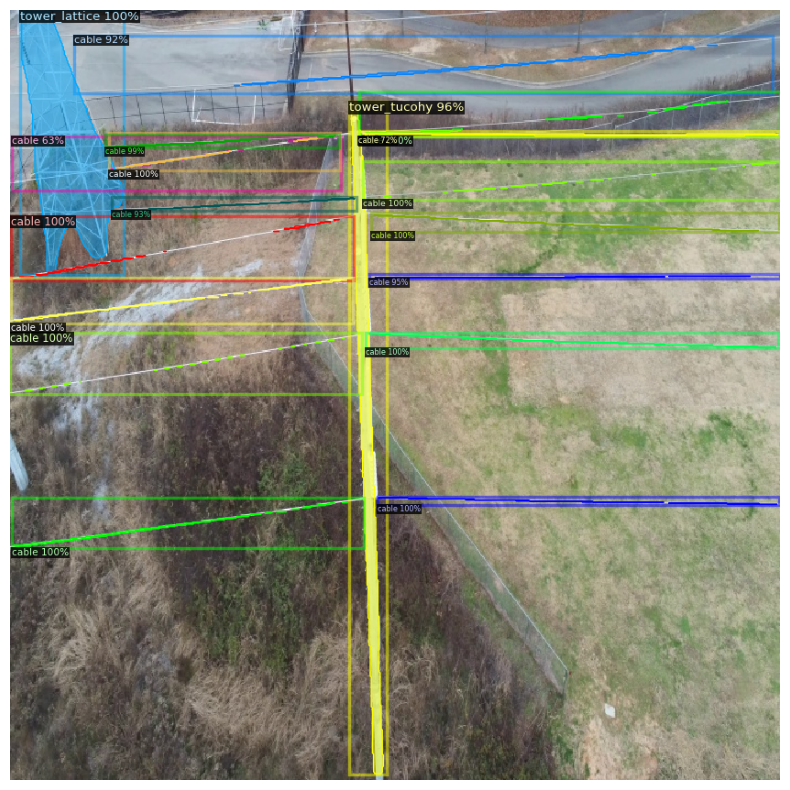

In [34]:
testset_list = os.listdir(testset_path)
images = [file for file in testset_list if file.lower().endswith(('.jpg'))]
image_name = random.choice(images)
image_path = os.path.join(testset_path, image_name)
gprint(image_path)
selected = cv2.imread(image_path)
outputs = predictor(selected)

v = Visualizer(selected, MetadataCatalog.get(cfg.DATASETS.TEST[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(10, 10))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off')
save_fig_path = os.path.join(out_data_dir, 'predicted')
if not os.path.exists(save_fig_path):
    os.makedirs(save_fig_path)
fig_path = os.path.join(out_data_dir, 'predicted', image_name)
gprint(save_fig_path)
output_fields = outputs['instances'].get_fields()
gprint('pred_classes')
print(output_fields['pred_classes'])
gprint('scores')
print(output_fields['scores'])
plt.savefig(fig_path)
plt.show()